<a href="https://colab.research.google.com/github/deutschkihun/DataScience/blob/master/Starbucks_StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock price prediction**

## **Source file folder**
- [Google drive](https://drive.google.com/drive/folders/1fiPVMkS4VoQtOzlhIU16__lklyIbMLiU?usp=sharing)

## **Reference**
- [Github](https://github.com/kairess/stock_crypto_price_prediction/blob/master/stock_samsung.ipynb)
- [Yahoo finance](https://finance.yahoo.com/)



## 1.Importing Libraries 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense,GRU
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

## 2.Reading datasets

In [7]:
starbucks = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML DL/Projects/stock price prediction/starbucks.csv')

## 3.Data Visualization

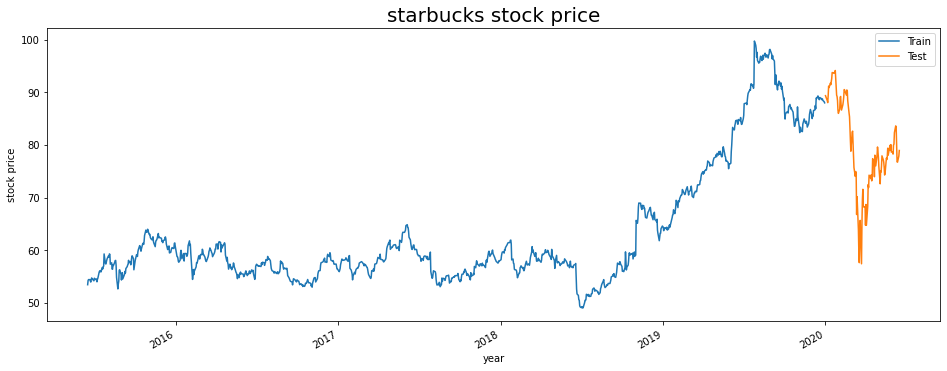

In [8]:
starbucks_copy =  pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML DL/Projects/stock price prediction/starbucks.csv',
                      index_col='Date', parse_dates=['Date'])

starbucks_copy["High"][:'2019'].plot(figsize=(16,6),legend=True)
starbucks_copy["High"]['2020':].plot(figsize=(16,6),legend=True)
plt.legend(['Train','Test'])
plt.title('starbucks stock price',fontsize=20)
plt.xlabel('year')
plt.ylabel('stock price');

## 4. Data preprocessing

### 4.1 Define middle price 

In [9]:
high_prices = starbucks['High'].values
low_prices = starbucks['Low'].values
mid_prices = (high_prices + low_prices) / 2

## 4.2 Create window

In [10]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])



## 4.3 Normalization  

In [11]:
# Normalization by ussig MinMaxscaler 

sc = MinMaxScaler(feature_range=(0,1))
result = sc.fit_transform(result)

## 4.4 Split train,validation and test data

In [12]:
row = int(round(result.shape[0] * 0.8))
train = result[:row, :]

In [13]:

# split train and test data
row = int(round(result.shape[0] * 0.8))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape


((966, 50, 1), (242, 50, 1))

## 5.1 Modeling Option 1: LSTM

In [ ]:
def solution_model():

  model = Sequential()
  model.add(LSTM(50,return_sequences=True))
  model.add(LSTM(64,return_sequences=False))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='linear'))


  model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])

  checkpoint_path = 'stockprice_checkpoint.ckpt'
  checkpoint = ModelCheckpoint(checkpoint_path,
                               save_weights_only=True, 
                               save_best_only=True, 
                               monitor='val_loss',
                                verbose=1)

  model.fit(x_train,y_train,
            callbacks=[checkpoint],
            validation_data=(x_test,y_test),          
            batch_size=15,
             verbose=2,
            epochs=30)
  model.load_weights(checkpoint_path)

  return model 

## 6.Training 

In [ ]:
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")

Train on 966 samples, validate on 242 samples
Epoch 1/30
 - 4s - loss: 0.0075 - accuracy: 0.0010 - val_loss: 0.0527 - val_accuracy: 0.0041

Epoch 00001: val_loss improved from inf to 0.05266, saving model to stockprice_checkpoint.ckpt
Epoch 2/30
 - 3s - loss: 0.0021 - accuracy: 0.0010 - val_loss: 0.0077 - val_accuracy: 0.0041

Epoch 00002: val_loss improved from 0.05266 to 0.00773, saving model to stockprice_checkpoint.ckpt
Epoch 3/30
 - 3s - loss: 0.0016 - accuracy: 0.0010 - val_loss: 0.0050 - val_accuracy: 0.0041

Epoch 00003: val_loss improved from 0.00773 to 0.00497, saving model to stockprice_checkpoint.ckpt
Epoch 4/30
 - 3s - loss: 0.0014 - accuracy: 0.0010 - val_loss: 0.0196 - val_accuracy: 0.0041

Epoch 00004: val_loss did not improve from 0.00497
Epoch 5/30
 - 3s - loss: 0.0011 - accuracy: 0.0010 - val_loss: 0.0037 - val_accuracy: 0.0041

Epoch 00005: val_loss improved from 0.00497 to 0.00367, saving model to stockprice_checkpoint.ckpt
Epoch 6/30
 - 3s - loss: 0.0011 - accurac

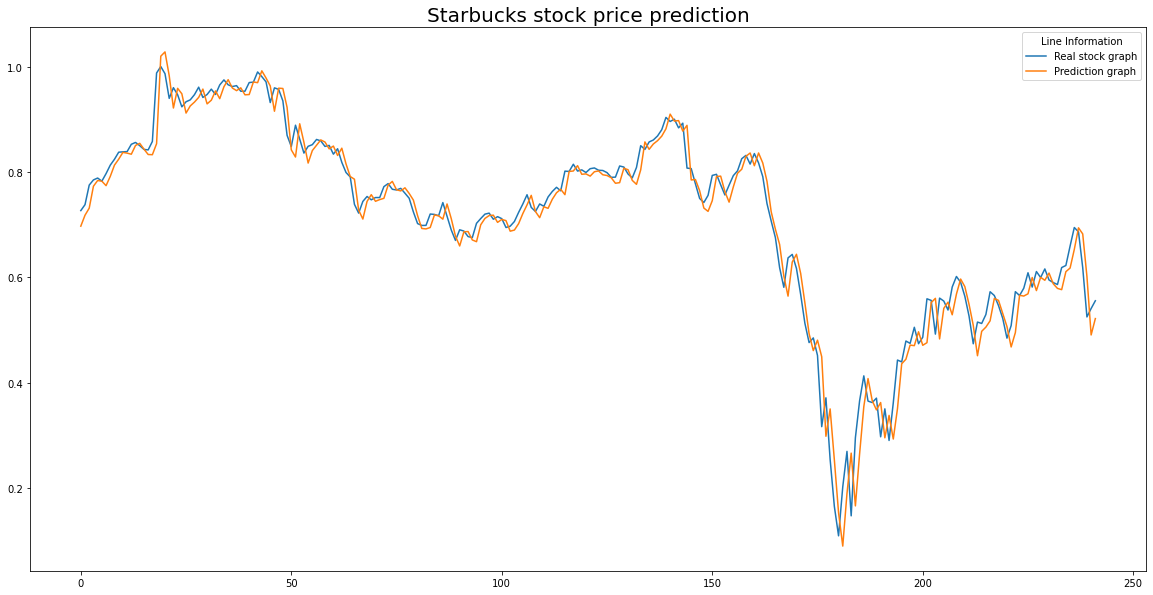

In [ ]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend(['Real stock graph','Prediction graph'],title='Line Information')
plt.title('Starbucks stock price prediction',fontsize=20);

## 5.2 Modelling Option 2: GRU

In [15]:
def solution_model():

  model = Sequential()
  model.add(GRU(50,return_sequences=True))
  model.add(GRU(64,return_sequences=False))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='linear'))


  model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])

  checkpoint_path = 'stockprice_checkpoint.ckpt'
  checkpoint = ModelCheckpoint(checkpoint_path,
                               save_weights_only=True, 
                               save_best_only=True, 
                               monitor='val_loss',
                                verbose=1)

  model.fit(x_train,y_train,
            callbacks=[checkpoint],
            validation_data=(x_test,y_test),          
            batch_size=15,
             verbose=2,
            epochs=30)
  model.load_weights(checkpoint_path)

  return model 

In [16]:
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")

Train on 966 samples, validate on 242 samples
Epoch 1/30
 - 5s - loss: 0.0055 - accuracy: 0.0010 - val_loss: 0.0129 - val_accuracy: 0.0041

Epoch 00001: val_loss improved from inf to 0.01286, saving model to stockprice_checkpoint.ckpt
Epoch 2/30
 - 4s - loss: 0.0010 - accuracy: 0.0010 - val_loss: 0.0031 - val_accuracy: 0.0041

Epoch 00002: val_loss improved from 0.01286 to 0.00310, saving model to stockprice_checkpoint.ckpt
Epoch 3/30
 - 4s - loss: 8.5092e-04 - accuracy: 0.0010 - val_loss: 0.0027 - val_accuracy: 0.0041

Epoch 00003: val_loss improved from 0.00310 to 0.00271, saving model to stockprice_checkpoint.ckpt
Epoch 4/30
 - 4s - loss: 8.1584e-04 - accuracy: 0.0010 - val_loss: 0.0024 - val_accuracy: 0.0041

Epoch 00004: val_loss improved from 0.00271 to 0.00238, saving model to stockprice_checkpoint.ckpt
Epoch 5/30
 - 4s - loss: 6.3340e-04 - accuracy: 0.0010 - val_loss: 0.0033 - val_accuracy: 0.0041

Epoch 00005: val_loss did not improve from 0.00238
Epoch 6/30
 - 4s - loss: 5.39

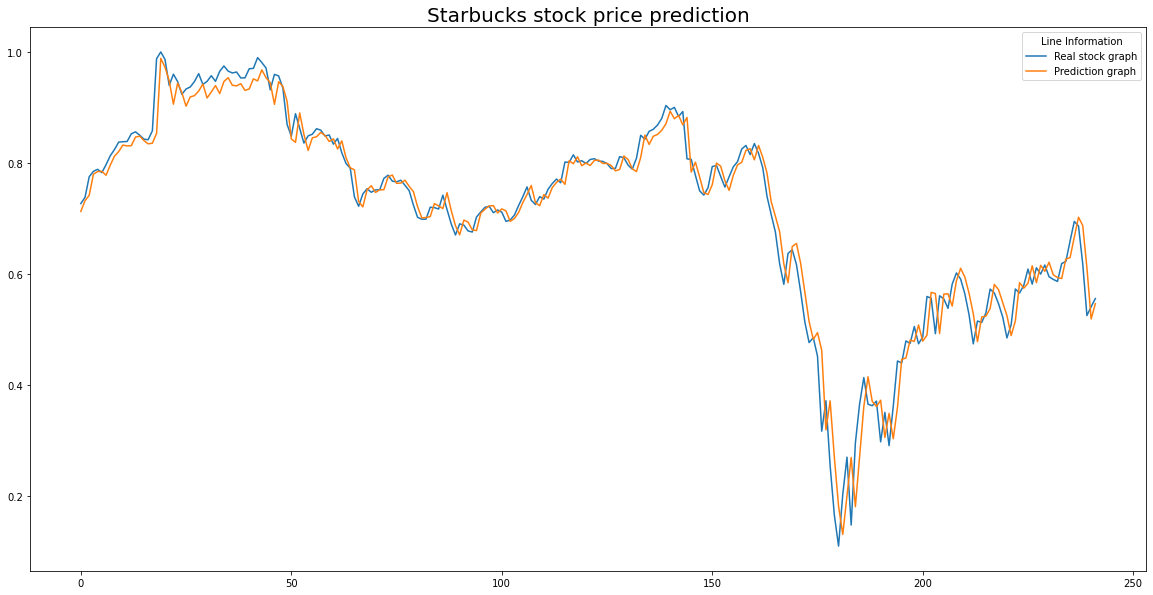

In [17]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend(['Real stock graph','Prediction graph'],title='Line Information')
plt.title('Starbucks stock price prediction',fontsize=20);